<h2 style="text-align:center;">IMDb Movie Review Sentiment Analysis (LSTM)</h2>

<h3 style="text-align:center;">Part A: NLP-Final Project</h3>

---


## 1. Introduction <a name="introduction"></a>

This project performs sentiment analysis on IMDb movie reviews using deep learning techniques. We compare with advanced deep learning models (LSTM).

In [ ]:
# Install required packages
!pip install tensorflow transformers pandas numpy matplotlib nltk seaborn

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
gpu_device_name = tf.test.gpu_device_name()
if gpu_device_name:
    print("GPU device name:", gpu_device_name)
else:
    print("No GPU found")

TensorFlow version: 2.18.0
No GPU found


## 2. Data Loading and Exploration <a name="data-loading"></a>

First, we load and explore the dataset to understand its structure and characteristics.

**Importing Required Libraries**

We import necessary packages for:
- Data manipulation (pandas, numpy)
- Data visualization (matplotlib, seaborn)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_theme()

**Loading and Initial Exploration**

Load the dataset and perform initial inspection:
- Check dataset dimensions
- Examine first few rows
- Identify missing values
- Analyze sentiment distribution

In [ ]:
# Load the data
df = pd.read_csv('/content/data_imdb.csv')

# Initial exploration
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())

Dataset shape: (50000, 2)

First 5 rows:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Missing values:
review       0
sentiment    0
dtype: int64

Sentiment distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


**Review Length Analysis**

Analyze the length of reviews:
- Create new column for review length
- Calculate descriptive statistics
- Visualize distribution of lengths


Review length statistics:
count    50000.000000
mean      1309.367720
std        989.759532
min          7.000000
25%        699.000000
50%        970.000000
75%       1590.000000
max      13704.000000
Name: review_length, dtype: float64


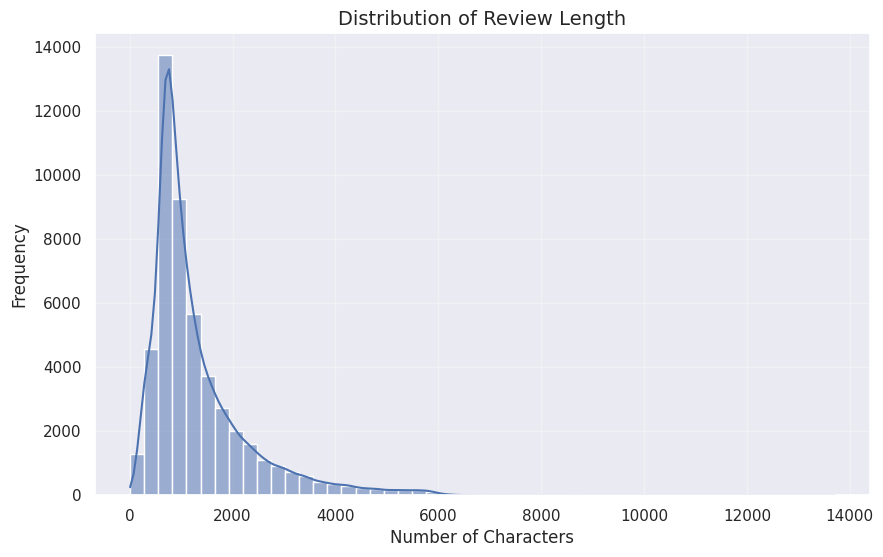

In [ ]:
# Analyze review length
df['review_length'] = df['review'].apply(len)
print("\nReview length statistics:")
print(df['review_length'].describe())

# Plot review length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Length', fontsize=14)
plt.xlabel('Number of Characters', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## 3. Text Preprocessing <a name="preprocessing"></a>

Clean and prepare the text data for analysis by removing noise and standardizing the format.

**Importing Required Libraries**

We import necessary packages for:
- Regular expressions (`re`) for pattern matching
- NLTK for natural language processing
- Text processing tools (stopwords, tokenizer, lemmatizer)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

**Downloading NLTK Resources**

Download required NLTK data packages:
- `punkt` for tokenization
- `stopwords` for common English stopwords
- `wordnet` for lemmatization
- `punkt_tab` for improved tokenization

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**Initializing Text Processing Tools**

Set up our text cleaning pipeline components:
- Lemmatizer to reduce words to base forms
- Stopwords list for filtering common words

In [ ]:
# Initialize text processing tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

**Text Preprocessing Function**

This comprehensive cleaning function performs:
1. Case normalization (lowercasing)
2. HTML tag removal
3. Special character/number removal
4. Tokenization
5. Stopword removal
6. Lemmatization
7. Rejoining tokens into clean text

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

**Applying Preprocessing to Reviews**

Apply our cleaning function to all reviews:
- Creates new column with cleaned text
- Shows sample before/after comparison

In [ ]:
# Apply preprocessing
df['cleaned_review'] = df['review'].apply(preprocess_text)
print("\nSample cleaned reviews:")
print(df[['review', 'cleaned_review']].head())


Sample cleaned reviews:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  


## 4. Feature Extraction <a name="feature-extraction"></a>

Convert text into numerical features that machine learning models can process.


**TF-IDF Vectorization:**
TF-IDF (Term Frequency-Inverse Document Frequency) is used to convert text data into numerical features that represent the importance of words in documents relative to their frequency across all documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer with maximum 5000 features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Transform cleaned reviews into TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_review'])

**Explanation:**
- `TfidfVectorizer` converts text to TF-IDF features matrix
- `max_features=5000` limits the vocabulary size to top 5000 terms
- `fit_transform()` learns vocabulary and transforms text data in one step
- Output is a sparse matrix where each row represents a review and columns represent TF-IDF scores for each word





**Label Encoding:**

Convert sentiment labels from text to numerical values for machine learning.

In [ ]:
# Convert sentiment to numerical values (positive=1, negative=0)
y = df['sentiment'].map({'positive': 1, 'negative': 0})

**Explanation:**
- Maps 'positive' sentiment to 1 and 'negative' to 0
- This binary encoding is required for most classification algorithms


**Train-Test Split:**

Split the dataset into training and testing subsets for model evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y,
    test_size=0.2,
    random_state=42
)

# Display dataset sizes
print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (40000, 5000)
Testing set size: (10000, 5000)


**Explanation:**
- `train_test_split` randomly divides the data while maintaining class proportions
- `test_size=0.2` allocates 20% of data for testing
- `random_state=42` ensures reproducible splits
- Shapes are printed to verify proper splitting

---

## 5. LSTM <a name="lstm"></a>

1. Implement a more sophisticated neural network with LSTM layers.


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

**Key Components:**
- `Tokenizer`: Converts text to numerical sequences
- `pad_sequences`: Ensures uniform sequence length
- `Sequential`: Linear stack of layers
- `Embedding`: Word embedding layer
- `LSTM`: Long Short-Term Memory layer
- `Dense`: Fully connected neural layer

### 2. Text Tokenization and Sequencing

In [ ]:
# Initialize tokenizer with 5000 word vocabulary
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['cleaned_review'])

# Convert text to sequences
X_seq = tokenizer.texts_to_sequences(df['cleaned_review'])

# Pad sequences to uniform length (200)
X_pad = pad_sequences(X_seq, maxlen=200)

**Key Parameters:**
- `num_words=5000`: Limits vocabulary to top 5000 frequent words
- `maxlen=200`: Truncates/pads sequences to 200 tokens

**Process Flow:**
1. Builds word index from cleaned reviews
2. Transforms text to sequences of word indices
3. Standardizes sequence length for model input

### 3. Train-Test Split

In [ ]:
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_pad, y, test_size=0.2, random_state=42)

### 4. LSTM Model Architecture

In [ ]:
model = Sequential([
    # Embedding layer (5000 words → 128-dim vectors)
    Embedding(input_dim=5000, output_dim=128, input_length=200),

    # LSTM layer with dropout regularization
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),

    # Fully connected layer
    Dense(64, activation='relu'),

    # Dropout for regularization
    Dropout(0.5),

    # Output layer (sigmoid for binary classification)
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


**Layer Breakdown:**
1. **Embedding**: Learns word representations
   - `input_dim`: Vocabulary size
   - `output_dim`: Embedding dimension
   - `input_length`: Fixed sequence length

2. **LSTM**: Processes sequential data
   - `dropout`: Input dropout rate
   - `recurrent_dropout`: Recurrent dropout rate

3. **Dense+Dropout**: Prevents overfitting
   - 64 neurons with ReLU activation
   - 50% dropout rate

4. **Output**: Single neuron with sigmoid for binary classification

### 5. Model Compilation

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

**Configuration:**
- **Optimizer**: Adam (adaptive learning rate)
- **Loss**: Binary crossentropy (standard for binary classification)
- **Metrics**: Accuracy (percentage of correct predictions)

**`summary()` Output** shows:
- Layer types and output shapes
- Number of trainable parameters

### 6. Model Training

In [ ]:
history = model.fit(X_train_lstm, y_train_lstm,
                   epochs=3,
                   batch_size=64,
                   validation_split=0.2)

Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 315s 619ms/step - accuracy: 0.7470 - loss: 0.4920 - val_accuracy: 0.8604 - val_loss: 0.3347
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 299s 599ms/step - accuracy: 0.8857 - loss: 0.2972 - val_accuracy: 0.8674 - val_loss: 0.3121
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 310s 619ms/step - accuracy: 0.8992 - loss: 0.2600 - val_accuracy: 0.8709 - val_loss: 0.3195


**Training Parameters:**
- `epochs=3`: Number of full passes through data
- `batch_size=64`: Samples per gradient update
- `validation_split=0.2`: 20% training data for validation

**History Object Contains:**
- Training/validation metrics per epoch
- Can be used for plotting learning curves

### 7. Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_lstm, y_test_lstm)
print(f"\nLSTM Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step - accuracy: 0.8745 - loss: 0.3018

LSTM Test Accuracy: 0.8733


**Evaluation Metrics:**
- Reports final loss and accuracy on test set
- Compare with previous model accuracies

### 8. Visualizations

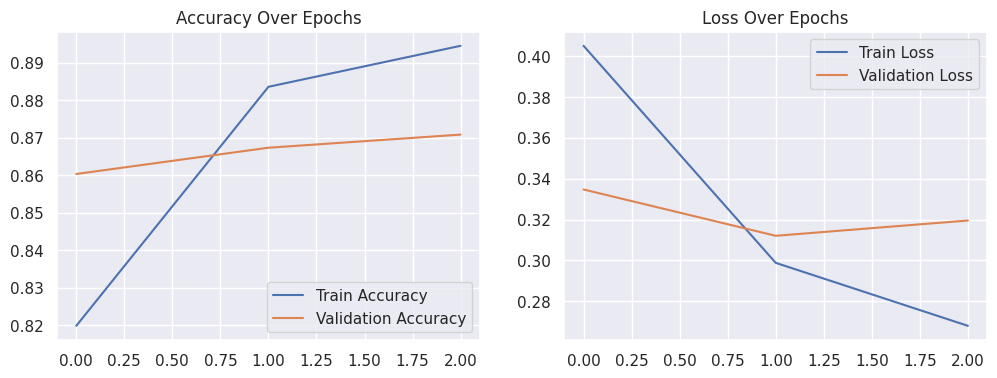

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

**Visualization Benefits:**
- Identifies overfitting/underfitting
- Shows convergence behavior
- Helps determine optimal epoch count

---